# ISLR Chapter 4 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions in Python by Arthur Avila

### 10. This question should be answered using the `Weekly` data set, which is part of the `ISLR` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

#### (a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Weekly = pd.read_csv('Weekly.csv', index_col=0)
print(Weekly.shape)
print(Weekly.info())
print(Weekly.describe())
print(Weekly.head())

(1089, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 1 to 1089
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 85.1+ KB
None
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000   

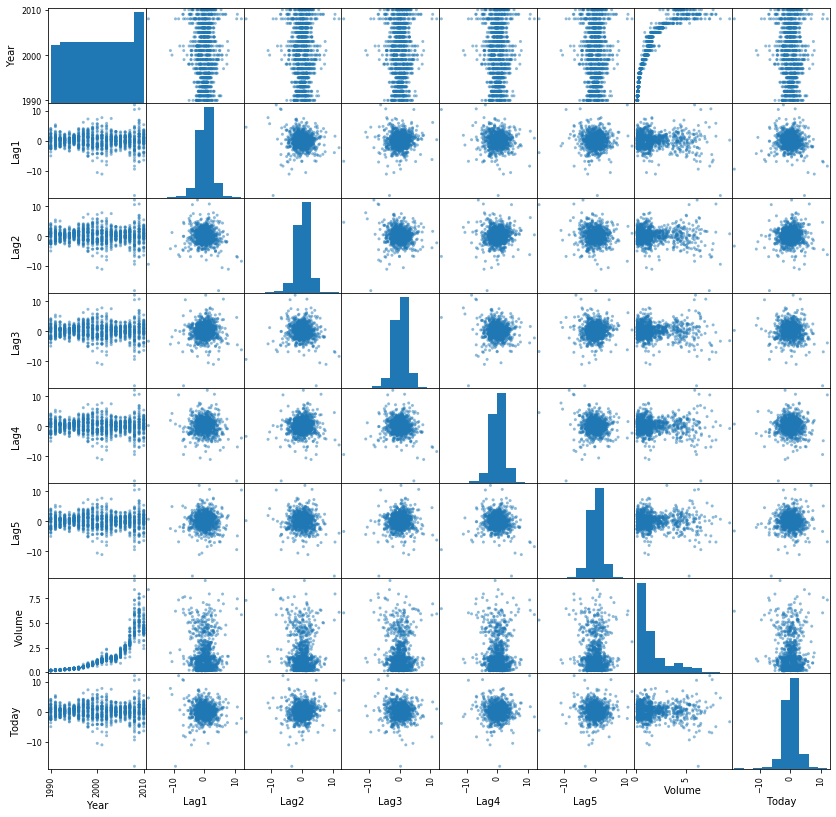

In [2]:
pd.plotting.scatter_matrix(Weekly, figsize=(14,14))
plt.show()

In [3]:
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

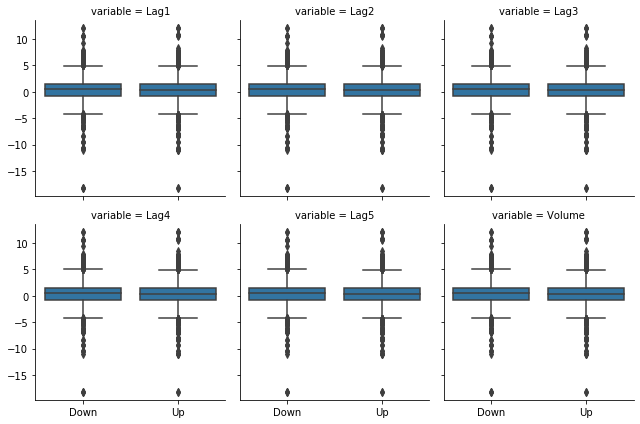

In [4]:
melted = Weekly.melt(id_vars='Direction', value_vars=Weekly.columns[1:7])
g = sns.FacetGrid(melted, col='variable', col_wrap=3)
g = g.map(sns.boxplot, y=melted.value, x=melted.Direction, order=['Down','Up'])

#### (b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [5]:
X = np.asarray(Weekly.iloc[:,1:7])
Y = (Weekly.Direction=='Up')
logit_m = sm.Logit(Y,sm.add_constant(X))
logit_res = logit_m.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                0.006580
Time:                        17:31:36   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
x1            -0.0413      0.

#### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [6]:
logit_pred = np.array(['Up' if p >.5 else 'Down' for p in logit_res.predict()])
def reportf(pred,actual=Weekly.Direction):
    predictions = pd.DataFrame({'Prediction':pred, 'Actual':actual})
    confusion = pd.crosstab(predictions.Prediction, predictions.Actual) 
    print(confusion)
    correct = confusion.loc['Down','Down']+confusion.loc['Up','Up']
    correct_rate = correct/predictions.shape[0]
    correct_up_rate = confusion.loc['Up','Up']/confusion.loc['Up',:].sum()
    always_up_rate = np.mean(predictions.Actual == 'Up')

    print('Correct prediction rate:          ', correct_rate)
    print('Correct prediction "Up" rate:     ', correct_up_rate)
    print('Correct prediction of always "Up":', always_up_rate)

reportf(logit_pred)

Actual      Down   Up
Prediction           
Down          54   48
Up           430  557
Correct prediction rate:           0.5610651974288338
Correct prediction "Up" rate:      0.5643363728470111
Correct prediction of always "Up": 0.5555555555555556


In [7]:
# Same with sklearn
logit_skl = LogisticRegression(random_state=123, solver='liblinear')
logit_clf = logit_skl.fit(X,Y)
logit_pred = np.array(['Up' if p >.5 else 'Down' for p in logit_clf.predict(X)])
reportf(logit_pred)

# Same with sklearn adding constant column
N = X.shape[0]
X1 = np.c_[np.ones(N),X]
logit_clf = logit_skl.fit(X1,Y)
logit_pred = np.array(['Up' if p >.5 else 'Down' for p in logit_clf.predict(X1)])
reportf(logit_pred)

# They should be the same, but they are not

Actual      Down   Up
Prediction           
Down          55   47
Up           429  558
Correct prediction rate:           0.5629017447199265
Correct prediction "Up" rate:      0.5653495440729484
Correct prediction of always "Up": 0.5555555555555556
Actual      Down   Up
Prediction           
Down          54   47
Up           430  558
Correct prediction rate:           0.5619834710743802
Correct prediction "Up" rate:      0.5647773279352226
Correct prediction of always "Up": 0.5555555555555556


#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [8]:
X = np.asarray(Weekly.loc[Weekly.Year<=2008,'Lag2'])
X_test = np.asarray(Weekly.loc[Weekly.Year>2008,'Lag2'])
Y = (Weekly.loc[Weekly.Year<=2008,'Direction']=='Up')
Y_test = Weekly.loc[Weekly.Year>2008,'Direction']
logit_m = sm.Logit(Y,sm.add_constant(X))
logit_res = logit_m.fit()
print(logit_res.summary())
logit_pred = np.array(['Up' if p >.5 else 'Down' for p in logit_res.predict(sm.add_constant(X_test))])

reportf(logit_pred,Y_test)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                0.003076
Time:                        17:31:36   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
x1             0.0581      0.

In [9]:
# Same with sklearn adding constant column
N = X.shape[0]
X1 = np.c_[np.ones(N),X]
N = X_test.shape[0]
X1_test = np.c_[np.ones(N),X_test]

Y = Weekly.loc[Weekly.Year<=2008,'Direction']

logit_clf = logit_skl.fit(X1,Y)

logit_pred = logit_clf.predict(X1_test) #np.array(['Up' if p >.5 else 'Down' for p in logit_clf.predict(X1_test)])
reportf(logit_pred, Y_test)

# Without constant
# Because there is only one column need to redefine X so that sklearn sees a matrix instead of series
X = np.c_[Weekly.loc[Weekly.Year<=2008,'Lag2']]
X_test = np.c_[Weekly.loc[Weekly.Year>2008,'Lag2']]

logit_clf = logit_skl.fit(X,Y)
logit_pred = logit_clf.predict(X_test)
reportf(logit_pred, Y_test)

Actual      Down  Up
Prediction          
Down           9   5
Up            34  56
Correct prediction rate:           0.625
Correct prediction "Up" rate:      0.6222222222222222
Correct prediction of always "Up": 0.5865384615384616
Actual      Down  Up
Prediction          
Down           9   5
Up            34  56
Correct prediction rate:           0.625
Correct prediction "Up" rate:      0.6222222222222222
Correct prediction of always "Up": 0.5865384615384616


#### (e) Repeat (d) using LDA.

In [10]:
lda = LinearDiscriminantAnalysis()
lda_clf = lda.fit(X,Y)
lda_pred = lda_clf.predict(X_test)
reportf(lda_pred,Y_test)

Actual      Down  Up
Prediction          
Down           9   5
Up            34  56
Correct prediction rate:           0.625
Correct prediction "Up" rate:      0.6222222222222222
Correct prediction of always "Up": 0.5865384615384616


#### (f) Repeat (d) using QDA.

In [11]:
qda = QuadraticDiscriminantAnalysis()
qda_clf = qda.fit(X,Y)
qda_pred = qda_clf.predict(X_test)

predictions = pd.DataFrame({'Prediction':qda_pred, 'Actual':Y_test})
confusion = pd.crosstab(predictions.Prediction, predictions.Actual) 
print(confusion)

correct = confusion.loc['Up','Up']
correct_rate = correct/predictions.shape[0]
correct_up_rate = confusion.loc['Up','Up']/confusion.loc['Up',:].sum()
always_up_rate = np.mean(predictions.Actual == 'Up')

print('Correct prediction rate:          ', correct_rate)
print('Correct prediction "Up" rate:     ', correct_up_rate)
print('Correct prediction of always "Up":', always_up_rate)


Actual      Down  Up
Prediction          
Up            43  61
Correct prediction rate:           0.5865384615384616
Correct prediction "Up" rate:      0.5865384615384616
Correct prediction of always "Up": 0.5865384615384616


#### (g) Repeat (d) using KNN with K = 1.

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
knn1 = KNeighborsClassifier(1)
knn1_clf = knn1.fit(X,Y)
knn1_pred = knn1_clf.predict(X_test)
reportf(knn1_pred, Y_test)

Actual      Down  Up
Prediction          
Down          16  14
Up            27  47
Correct prediction rate:           0.6057692307692307
Correct prediction "Up" rate:      0.6351351351351351
Correct prediction of always "Up": 0.5865384615384616


#### (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

# Many specifications will produce collinearity or difision by zero
# in the confusion matrix. This will make results readable
import warnings
#warnings.filterwarnings("ignore", message="Variables are collinear")
warnings.simplefilter("ignore")

def reportf(X,interact = True, power=False):
    print('\n\n',X.columns)
    X = np.c_[X] # Guarantees single columns as matrix and numpy format
    if interact:
        poly = PolynomialFeatures(2, -power)
        X = poly.fit_transform(X)
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X) # standardize features
    
    # split train test features
    train = Weekly['Year']<=2008
    X_train = np.c_[X][train,:]
    X_test = np.c_[X][-train,:]
    Y_train = Weekly.Direction[train]
    Y_test = Weekly.Direction[-train]
    
    # sklearn classifiers
    logit = LogisticRegression(random_state=123, solver='liblinear')
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    knn1 = KNeighborsClassifier(1)
    knn3 = KNeighborsClassifier(3)
    knn5 = KNeighborsClassifier(5)
    
    # create report
    Classifiers = [logit, lda, qda, knn1, knn3, knn5]
    CLF_names = ['logit', 'lda', 'qda', 'knn1', 'knn3', 'knn5']
    report = pd.DataFrame(np.zeros((2,6)),['Correct%','Correct_Up%'],CLF_names)
    
    for name, clf in zip(CLF_names, Classifiers):
        clf_fit = clf.fit(X_train,Y_train)
        clf_pred = clf.predict(X_test)
        correct = clf.score(X_test,Y_test)
        confusion = confusion_matrix(clf_pred, Y_test)
        correctUp = confusion[1,1]/(confusion[1:].sum())
        report[name]=[correct,correctUp]
    
    print(report)

reportf(Weekly.iloc[:,1:7], False)
reportf(Weekly.iloc[:,1:7])

reportf(Weekly.iloc[:,1:3], False)
reportf(Weekly.iloc[:,1:3])

reportf(Weekly.iloc[:,2:3], False)
reportf(Weekly.iloc[:,2:3])

reportf(Weekly.iloc[:,3:6], False)
reportf(Weekly.iloc[:,3:6])

#warnings.filterwarnings("default", message="Variables are collinear")
warnings.simplefilter("default")




 Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')
                logit       lda       qda      knn1      knn3      knn5
Correct%     0.461538  0.461538  0.432692  0.480769  0.509615  0.500000
Correct_Up%  0.586207  0.586207  0.545455  0.568627  0.586207  0.578947


 Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')
                logit       lda       qda      knn1      knn3      knn5
Correct%     0.567308  0.576923  0.442308  0.490385  0.490385  0.509615
Correct_Up%  0.611111  0.616438  0.545455  0.580000  0.574074  0.596154


 Index(['Lag1', 'Lag2'], dtype='object')
                logit       lda       qda      knn1      knn3      knn5
Correct%     0.576923  0.576923  0.557692  0.480769  0.519231  0.490385
Correct_Up%  0.595506  0.595506  0.586207  0.561404  0.603774  0.580000


 Index(['Lag1', 'Lag2'], dtype='object')
                logit       lda       qda      knn1      knn3      knn5
Correct%     0.557692  0.557692  0.41346

In [14]:
confusion_matrix(qda_pred,Y_test)

array([[ 0,  0],
       [43, 61]])

### 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

#### (a) Create a binary variable, `mpg01` , that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [15]:
auto = pd.read_table('Auto.data', delim_whitespace=True, na_values='?')
auto['mpg01'] = auto.mpg >= auto.mpg.median()
auto.drop(columns=['mpg','name'], inplace=True)
auto.dropna(inplace=True)
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 8 columns):
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
mpg01           392 non-null bool
dtypes: bool(1), float64(4), int64(3)
memory usage: 24.9 KB
None


#### (b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

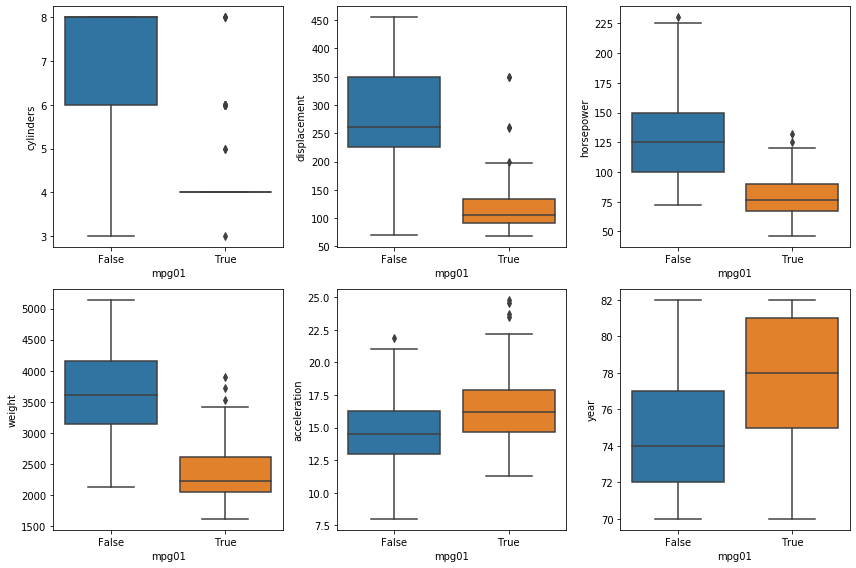

origin    1   2   3
mpg01              
False   173  14   9
True     72  54  70


In [16]:
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=auto.iloc[:,i], x=auto.mpg01)
plt.tight_layout()    
plt.show()

print(pd.crosstab(auto.mpg01,auto.origin))

#### (c) Split the data into a training set and a test set.

In [17]:
X = auto.iloc[:,[0,1,2,3,5]] #removes acceleration and origin
X = np.c_[X,pd.get_dummies(auto['origin'], drop_first=True)] #adds origin as dummies

X_train, X_test, Y_train, Y_test = train_test_split(X, auto.mpg01, 
                                                    test_size=1/3, random_state = 999)
print(X_train.shape)
print(X_test.shape)

(261, 7)
(131, 7)


#### (d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [18]:
lda = LinearDiscriminantAnalysis()
def reportf(classifier):
    clf = classifier.fit(X_train,Y_train)
    clf_pred = clf.predict(X_test)
    print(pd.DataFrame(confusion_matrix(clf_pred, Y_test),[False, True], [False, True]))
    error = (1-clf.score(X_test,Y_test))*100
    print(f'The error rate is {round(error,3)}%')

reportf(lda)

       False  True 
False     59      3
True       6     63
The error rate is 6.87%


#### (e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [19]:
qda = QuadraticDiscriminantAnalysis()
reportf(qda)

       False  True 
False     58      3
True       7     63
The error rate is 7.634%


#### (f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [20]:
print(sm.Logit(Y_train,sm.add_constant(np.asarray(X_train))).fit().summary())

logit = LogisticRegression(random_state=123, solver='liblinear')
reportf(logit)

Optimization terminated successfully.
         Current function value: 0.194107
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  261
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                            7
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.7200
Time:                        17:31:39   Log-Likelihood:                -50.662
converged:                       True   LL-Null:                       -180.91
Covariance Type:            nonrobust   LLR p-value:                 1.614e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5367      6.016     -2.915      0.004     -29.329      -5.745
x1            -0.0194      0

#### (g) Perform KNN on the training data, with several values of $K$, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of `K` seems to perform the best on this data set?

In [21]:
for k in range(1,10):
    knn = KNeighborsClassifier(k)
    reportf(knn)
    print(f' for k = {k}.\n')

       False  True 
False     59      5
True       6     61
The error rate is 8.397%
 for k = 1.

       False  True 
False     62     12
True       3     54
The error rate is 11.45%
 for k = 2.

       False  True 
False     61      9
True       4     57
The error rate is 9.924%
 for k = 3.

       False  True 
False     62     12
True       3     54
The error rate is 11.45%
 for k = 4.

       False  True 
False     59     11
True       6     55
The error rate is 12.977%
 for k = 5.

       False  True 
False     62     11
True       3     55
The error rate is 10.687%
 for k = 6.

       False  True 
False     59      7
True       6     59
The error rate is 9.924%
 for k = 7.

       False  True 
False     60      9
True       5     57
The error rate is 10.687%
 for k = 8.

       False  True 
False     58      5
True       7     61
The error rate is 9.16%
 for k = 9.



### 12. This problem involves writing functions.

#### (a) Write a function, `Power() `, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results.

*Hint: Recall that $x^a$ raises $x$ to the power $a$. Use the `print()` function to output the result.*

In [22]:
def Power():
    print(2**3)

Power()

8


#### (b) Create a new function, `Power2() `, that allows you to pass any two numbers, `x` and `a` , and prints out the value of `x^a`. You can do this by beginning your function with the line
```
> Power2 = function (x , a ) {
```
#### You should be able to call your function by entering, for instance,
```
> Power2 (3 ,8)
```
#### on the command line. This should output the value of $3^8$, namely, 6,561.

In [23]:
def Power2(x,a):
    print(x**a)

Power2(3,8)

6561


#### (c) Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

In [24]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

1000
2251799813685248
2248091


#### (d) Now create a new function, `Power3()` , that actually returns the result `x^a` as an `R` object, rather than simply printing it to the screen. That is, if you store the value `x^a` in an object called result within your function, then you can simply `return()` this result, using the following line:
```
return(result)
```
#### The line above should be the last line in your function, before the `}` symbol.

In [25]:
def Power3(x,a):
    return x**a
Power3(10,0)

1

#### (e) Now using the `Power3()` function, create a plot of $f(x) = x^2$. The $x$-axis should display a range of integers from 1 to 10, and the $y$-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the $x$-axis, the $y$-axis, or both on the log-scale. You can do this by using `log="x"`, `log="y"`, or `log="xy"` as arguments to the `plot()` function.

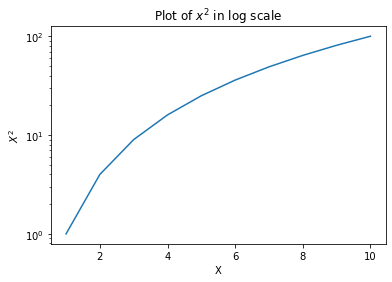

In [26]:
x=np.arange(1,11)
plt.plot(x,Power3(x,2))
plt.yscale('log')
plt.xlabel('X')
plt.ylabel('$X^2$')
plt.title('Plot of $x^2$ in log scale')
plt.show()

#### (f) Create a function, `PlotPower()`, that allows you to create a plot of `x` against `x^a` for `a` fixed a and for a range of values of `x`. For instance, if you call
```
> PlotPower (1:10 ,3)
```
#### then a plot should be created with an $x$-axis taking on values $1, 2, \dots , 10$, and a $y$-axis taking on values $1^3, 2^3, \dots, 10^3$.

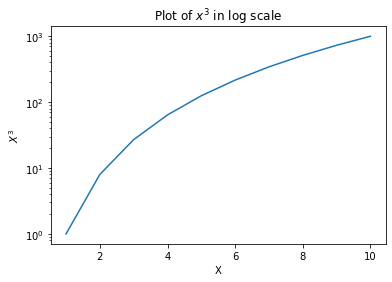

In [27]:
def PlotPower(x,a):
    plt.plot(x,Power3(x,a))
    plt.yscale('log')
    plt.xlabel('X')
    plt.ylabel(f'$X^{a}$')
    plt.title(f'Plot of $x^{a}$ in log scale')
    plt.show()
PlotPower(x,3)

### 13. Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [28]:
from sklearn.datasets import load_boston
BostonData = load_boston()
Boston = pd.DataFrame(BostonData.data, columns = BostonData.feature_names)
Boston['MEDV'] = BostonData.target
print(Boston.head())
print('\nNumber of rows and columns:\n')
print(Boston.shape)
print('\n\n')
print(BostonData.DESCR)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Number of rows and columns:

(506, 14)



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM    

/home/arthur/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


CHAS        0.0       1.0
CRIM                     
False  0.948617  0.051383
True   0.913043  0.086957
All    0.930830  0.069170


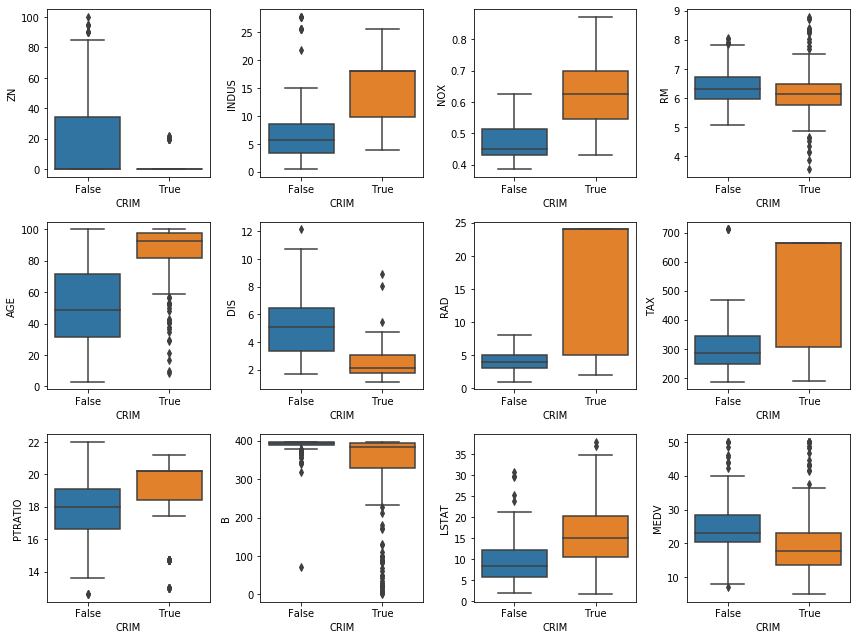

In [29]:
Boston.CRIM = pd.Series(Boston.CRIM > Boston.CRIM.median())

print(pd.crosstab(Boston.CRIM, Boston.CHAS, margins=True, normalize = 'index'))

plt.figure(figsize=(12,9))

names = Boston.columns.drop(['CRIM','CHAS'])
for i, name in zip(np.arange(names.size), names):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=Boston[name], x=Boston.CRIM)
plt.tight_layout()
plt.show()


In [30]:
(Boston.corr()>0.7)*round(Boston.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.0,0.00,0.0,0.72,-0.0,0.00,-0.0,0.00,0.00,0.0,-0.0,0.0,-0.0
ZN,-0.00,1.0,-0.00,-0.0,-0.00,0.0,-0.00,0.0,-0.00,-0.00,-0.0,0.0,-0.0,0.0
INDUS,0.00,-0.0,1.00,0.0,0.76,-0.0,0.00,-0.0,0.00,0.72,0.0,-0.0,0.0,-0.0
CHAS,0.00,-0.0,0.00,1.0,0.00,0.0,0.00,-0.0,-0.00,-0.00,-0.0,0.0,-0.0,0.0
NOX,0.72,-0.0,0.76,0.0,1.00,-0.0,0.73,-0.0,0.00,0.00,0.0,-0.0,0.0,-0.0
RM,-0.00,0.0,-0.00,0.0,-0.00,1.0,-0.00,0.0,-0.00,-0.00,-0.0,0.0,-0.0,0.0
AGE,0.00,-0.0,0.00,0.0,0.73,-0.0,1.00,-0.0,0.00,0.00,0.0,-0.0,0.0,-0.0
DIS,-0.00,0.0,-0.00,-0.0,-0.00,0.0,-0.00,1.0,-0.00,-0.00,-0.0,0.0,-0.0,0.0
RAD,0.00,-0.0,0.00,-0.0,0.00,-0.0,0.00,-0.0,1.00,0.91,0.0,-0.0,0.0,-0.0
TAX,0.00,-0.0,0.72,-0.0,0.00,-0.0,0.00,-0.0,0.91,1.00,0.0,-0.0,0.0,-0.0


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(Boston.iloc[:,1:],Boston['CRIM'],
                                                   random_state=999, test_size=0.25)

def reportf(cols = np.arange(13), rname = 'Correct%', interact = True, power=False):
    X_tr = np.c_[X_train][:,cols] # Guarantees single columns as matrix and numpy format
    X_ts = np.c_[X_test][:,cols] # Guarantees single columns as matrix and numpy format
    if interact:
        poly = PolynomialFeatures(2, -power)
        X_tr = poly.fit_transform(X_tr)
        X_ts = poly.fit_transform(X_ts)
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X) # standardize features
        
    # sklearn classifiers
    logit = LogisticRegression(random_state=123, solver='liblinear')
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    knn1 = KNeighborsClassifier(1)
    knn3 = KNeighborsClassifier(3)
    knn5 = KNeighborsClassifier(5)
    
    # create report
    Classifiers = [logit, lda, qda, knn1, knn3, knn5]
    CLF_names = ['logit', 'lda', 'qda', 'knn1', 'knn3', 'knn5']
    report = pd.DataFrame(np.zeros((1,6)),[rname],CLF_names)
    
    for name, clf in zip(CLF_names, Classifiers):
        clf_fit = clf.fit(X_tr,Y_train)
        correct = clf.score(X_ts,Y_test)
        report[name]=[correct]
    
#    print(report)
    return report

warnings.simplefilter("ignore") # too many models with collinearity models
myreport = reportf(rname='Model 0')

import itertools
Drop1 = [x for x in itertools.combinations(range(13),12)]
Drop2 = [x for x in itertools.combinations(range(13),11)]
Drop3 = [x for x in itertools.combinations(range(13),10)]
All = Drop1 + Drop2 + Drop3

myreport = reportf()
for cols, i in zip(All,range(np.array(All).size)):
    myreport = myreport.append(reportf(cols,f'Model {i+1}'))
warnings.simplefilter("default")

myreport.head()

,logit,lda,qda,knn1,knn3,knn5
Correct%,0.937008,0.929134,0.960630,0.929134,0.937008,0.929134
Model 1,0.968504,0.921260,0.968504,0.929134,0.929134,0.929134
Model 2,0.944882,0.921260,0.944882,0.952756,0.937008,0.929134
Model 3,0.944882,0.921260,0.960630,0.929134,0.929134,0.937008
Model 4,0.929134,0.944882,0.905512,0.929134,0.929134,0.929134


In [32]:
print(pd.DataFrame({'Best Preformance':myreport.max(),'Model':myreport.idxmax()}, myreport.max().index))

       Best Preformance      Model
logit          0.984252  Model 355
lda            0.968504  Model 145
qda            0.976378  Model 308
knn1           0.968504   Model 35
knn3           0.976378    Model 8
knn5           0.968504    Model 8
